In [1]:
from ecgprep import preprocess, read_ecg
import argparse
import h5py
import pandas as pd
import tqdm
import os
import matplotlib.pyplot as plt

In [2]:
input_file = 'RECORDS.txt'
root_dir = 'Training_WFDB'
out_file = 'cpsc2018.h5'

fmt = 'wfdb'

new_freq = 400
new_len = 4096
scale = 2
use_all_leads = True
remove_baseline = False
remove_powerline = None

# before

In [11]:
all_leads = ['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

In [ ]:
files = pd.read_csv(input_file, header=None).values.flatten()
folder = root_dir
n = len(files)

In [4]:
for i, f in enumerate(tqdm.tqdm(files)):
    break

  0%|          | 0/6877 [00:00<?, ?it/s]


In [5]:
i, f

(0, 'A0001')

In [6]:
ecg, sample_rate, leads = read_ecg.read_ecg(os.path.join(folder, f), format = fmt)
ecg, sample_rate, leads

(array([[ 0.028,  0.039,  0.045, ...,  0.258,  0.259,  0.259],
        [ 0.007,  0.011,  0.015, ...,  0.248,  0.249,  0.25 ],
        [-0.021, -0.028, -0.03 , ..., -0.01 , -0.01 , -0.009],
        ...,
        [-0.112, -0.11 , -0.108, ...,  0.194,  0.194,  0.195],
        [-0.596, -0.59 , -0.582, ...,  0.307,  0.307,  0.307],
        [-0.016, -0.007,  0.002, ...,  0.213,  0.214,  0.214]]),
 500,
 ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])

In [12]:
ecg_preprocessed, new_rate, new_leads = preprocess.preprocess_ecg(ecg, sample_rate, all_leads, # different lead names
                                                                          new_freq=new_freq,
                                                                          new_len=new_len,
                                                                          scale=scale,
                                                                          use_all_leads=use_all_leads,
                                                                          remove_baseline=remove_baseline,
                                                                          remove_powerline=remove_powerline)
ecg_preprocessed, new_rate, new_leads

(array([[0.14171106, 0.1594395 , 0.17288925, ..., 0.39309242, 0.39275198,
         0.38542676],
        [0.14743006, 0.16354509, 0.17610812, ..., 0.49229149, 0.48145571,
         0.46706677],
        [0.00571899, 0.00410559, 0.00321887, ..., 0.09919907, 0.08870373,
         0.08164001],
        ...,
        [0.67399432, 0.68610556, 0.69547994, ..., 0.84872576, 0.83049524,
         0.80987141],
        [0.40243078, 0.41866199, 0.43517433, ..., 0.80437317, 0.77749465,
         0.74812751],
        [0.22943044, 0.24075715, 0.25147973, ..., 1.04754011, 1.02553988,
         1.00114745]]),
 400,
 ['DI',
  'DII',
  'DIII',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'])

In [17]:
h5f = h5py.File(out_file, 'w')
x = None

In [24]:
for i, f in enumerate(tqdm.tqdm(files)):
    ecg, sample_rate, leads = read_ecg.read_ecg(os.path.join(folder, f), format=fmt)
    ecg_preprocessed, new_rate, new_leads = preprocess.preprocess_ecg(ecg, sample_rate, leads,
                                                                            new_freq=new_freq,
                                                                            new_len=new_len,
                                                                            scale=scale,
                                                                            use_all_leads=use_all_leads,
                                                                            remove_baseline=remove_baseline,
                                                                            remove_powerline=remove_powerline)
    if x is None:
        n_leads, n_samples = ecg_preprocessed.shape
        x = h5f.create_dataset('tracings', (n, n_samples, n_leads), dtype='f8')
        id = h5f.create_dataset('exam_id', (n,), dtype='i4')
    x[i, :, :] = ecg_preprocessed.T
    id[i] = int(f[1:])

100%|██████████| 6877/6877 [01:12<00:00, 94.38it/s] 


In [26]:
h5f.close()

# after

In [3]:
hdf5_file = h5py.File(out_file, "r")

In [4]:
i = 5000
hdf5_file['tracings'][i].shape, hdf5_file['tracings'][i]

((4096, 12),
 array([[ 1.24145610e+00,  8.53285528e-01, -3.88170576e-01, ...,
          1.47896607e+00,  1.47301702e+00,  1.38606422e+00],
        [ 1.42445056e+00,  1.19676218e+00, -2.27688378e-01, ...,
          1.61860816e+00,  1.64423297e+00,  1.57718148e+00],
        [ 1.54001226e+00,  1.36384931e+00, -1.76162956e-01, ...,
          1.69841640e+00,  1.75400555e+00,  1.70216316e+00],
        ...,
        [-9.39229601e-02, -1.43210548e-01, -4.92875877e-02, ...,
         -1.41490725e-01, -8.81774370e-02, -8.98035689e-02],
        [-8.80347171e-02, -8.88953595e-02, -8.60642428e-04, ...,
         -1.61820652e-01, -1.10680749e-01, -1.06103042e-01],
        [-1.06191098e-01, -8.71783243e-02,  1.90127736e-02, ...,
         -1.84537747e-01, -1.38945585e-01, -1.47926782e-01]]))

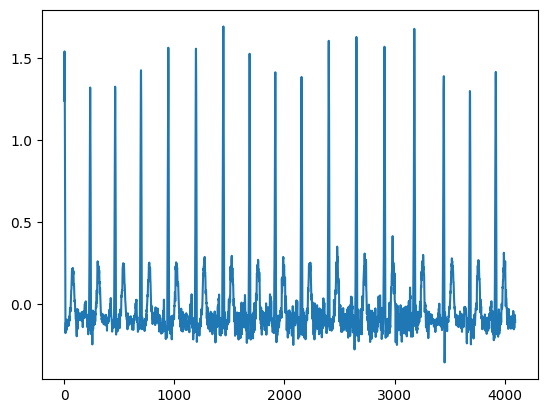

In [6]:
plt.plot(hdf5_file['tracings'][i, :, 0])

In [8]:
hdf5_file.close()